# Vocal detection in audio
## demonstation on making a model to detect the presence of human voice in audio clips


I will be training a model to determine if there is human vocals present in a clip of audio. This is not to recognize speech, words or anything like that just a smimple classification of yes there is human voice or not.

### Step 1: Data gathering


I have gathered together several types of non human audio from https://research.google.com/audioset//download_strong.html , human audio from librispeech https://www.openslr.org/12 ,  and some additional instramental and singing audio from my private dataset. In all the audio includes birds, thunder, vehicle sounds, instrumental music, singing and talking. This will provide data for what a human voice is not as well as a variation of human vocals with singing. For this first iteration I have split the sudio I have collected into 1 second chunks. I did not spend much time checking for if this resulted in silence for some samples so that might a point to improve upon later.

In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import where
import glob, os
import random
import math
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\tensorf

In [2]:
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.__version__)
import sys
print("Python version")
print (sys.version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1.14.0
Python version
3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]


In [3]:
def dataload(classFolder):
    class_labels = []
    class_samples = []
    for file in os.listdir(classFolder):
        
        data = np.load(classFolder+'//'+file)
        print(file)
        for i in data.keys():
            for j in data.get(i):
                class_samples.append(j)
                lab = file.strip(".npz")
                if lab == 'voice' or lab == 'singing':
                    class_labels.append("voice")
                else:
                    class_labels.append("not-voice")

    return class_labels, class_samples
def shuffle(class_labels, class_samples):
    temp = list(zip(class_labels, class_samples))
    random.shuffle(temp)
    res1, res2 = zip(*temp)
    # res1 and res2 come out as tuples, and so must be converted to lists.
    res1, res2 = list(res1), list(res2)
    return res1, res2
def encodeLabels(labels):
    label_dict = {}
    cnt = 0
    iter_i = 0
    for i in labels:
        if i in label_dict.keys():
            labels[iter_i] = label_dict[i]
        else:

            label_dict[i] = cnt
            labels[iter_i] = label_dict[i]
            cnt+=1
        iter_i += 1
    return label_dict

Generating class labels and sample list. shuffle it and encode labels into integers

In [4]:
class_labels, class_samples = dataload(os.getcwd()+'\\extract')

birds.npz
instramentalMusic.npz
singing.npz
thunder.npz
vehicle.npz
voice.npz


### Data preview

In [5]:
print("Number of 1 second samples:")
print(len(class_samples))
v1 = 0
v2 = 0
mark_voice = []
for i in range(len(class_labels)):
    if class_labels[i] == 'voice':
        v1+=1
        mark_voice.append(i)
    else:
        v2+=1
print("Number of voice samples:")
print(v1)
print("Number of other sound samples:")
print(v2)

Number of 1 second samples:
16605
Number of voice samples:
5549
Number of other sound samples:
11056


voice


C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


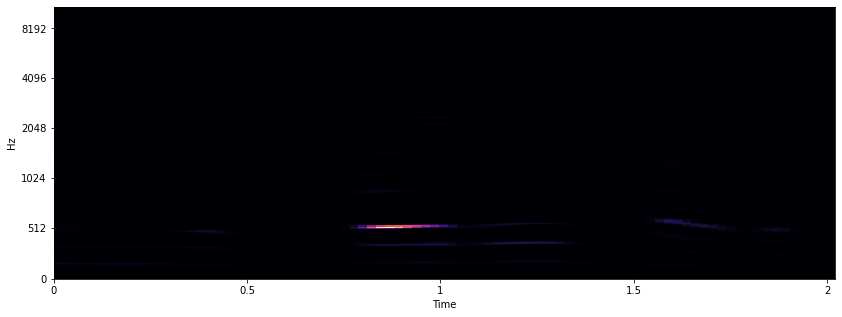

In [6]:
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.specshow(class_samples[mark_voice[5000]],x_axis='time', y_axis='mel')
print(class_labels[mark_voice[5000]])

In [7]:
import IPython.display as ipd

ipd.Audio(librosa.feature.inverse.mel_to_audio(class_samples[mark_voice[5000]]),rate=22050)

In [18]:
encoder = LabelEncoder()
y = encoder.fit_transform(class_labels)
scaler = StandardScaler()
#x = scaler.fit_transform(class_samples)
class_samples = np.expand_dims(class_samples, axis=-1)
x_train, x_val, y_train, y_val = train_test_split(class_samples, y, test_size=0.2) #this also shuffles

In [19]:
####

In [33]:
class_labels, class_samples = shuffle(class_labels,class_samples)
class_samples = np.expand_dims(class_samples, axis=-1)
label_dict = encodeLabels(class_labels)
print(label_dict)

{'voice': 0, 'not-voice': 1}


Split samples, 80% for training and 20% for validation

In [34]:
split_percent = 80
split_index = math.floor((len(class_labels)/100)*split_percent)

train_labels = np.asarray(class_labels[:split_index]) 
test_labels = np.asarray(class_labels[split_index :])
train_samples = np.asarray(class_samples[:split_index],dtype='float32')
test_samples = np.asarray(class_samples[split_index :],dtype='float32')

print(train_labels.shape)
print(train_samples.shape)

(13284,)
(13284, 256, 87, 1)


In [20]:
input_shape = class_samples[0].shape

## MODEL 1 

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 22272)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2850944   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 2,851,202
Trainable params: 2,851,202
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [23]:
EPOCHS = 10
H = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=100,
              validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

Train on 13284 samples, validate on 3321 samples
Epoch 1/10
13284/13284 [==============================] - 2s 115us/sample - loss: 0.2609 - acc: 0.9244 - val_loss: 1.1159 - val_acc: 0.8720
Epoch 2/10
13284/13284 [==============================] - 2s 115us/sample - loss: 0.2089 - acc: 0.9320 - val_loss: 1.1250 - val_acc: 0.8627
Epoch 3/10
13284/13284 [==============================] - 2s 113us/sample - loss: 0.1931 - acc: 0.9377 - val_loss: 1.1342 - val_acc: 0.8787
Epoch 4/10
13284/13284 [==============================] - 2s 114us/sample - loss: 0.1551 - acc: 0.9472 - val_loss: 1.0814 - val_acc: 0.8841
Epoch 5/10
13284/13284 [==============================] - 2s 114us/sample - loss: 0.1548 - acc: 0.9503 - val_loss: 1.1965 - val_acc: 0.8802
Epoch 6/10
13284/13284 [==============================] - 2s 113us/sample - loss: 0.1944 - acc: 0.9476 - val_loss: 1.1631 - val_acc: 0.8753
Epoch 7/10
13284/13284 [==============================] - 2s 113us/sample - loss: 0.1752 - acc: 0.9498 - val_lo

In [28]:
print(H.history)

{'loss': [0.2608544796489872, 0.20894373701624538, 0.19309087949940973, 0.15512046558702253, 0.15480796263425042, 0.1943850451516696, 0.1752015683352409, 0.15201340896744608, 0.20482733772797815, 0.17328398472813733], 'acc': [0.92442036, 0.93202347, 0.9376694, 0.94722974, 0.9503162, 0.94760615, 0.9497892, 0.9565643, 0.9494881, 0.9488106], 'val_loss': [1.115853781855921, 1.1250263423454472, 1.1341908943918735, 1.0814457014898549, 1.1964867840829796, 1.1630813726385254, 1.220191255503482, 1.436817052896681, 1.655704227386918, 1.5197464772302391], 'val_acc': [0.8720265, 0.86269194, 0.878651, 0.88407105, 0.8801566, 0.87533873, 0.8870822, 0.8834688, 0.8801566, 0.88617885]}


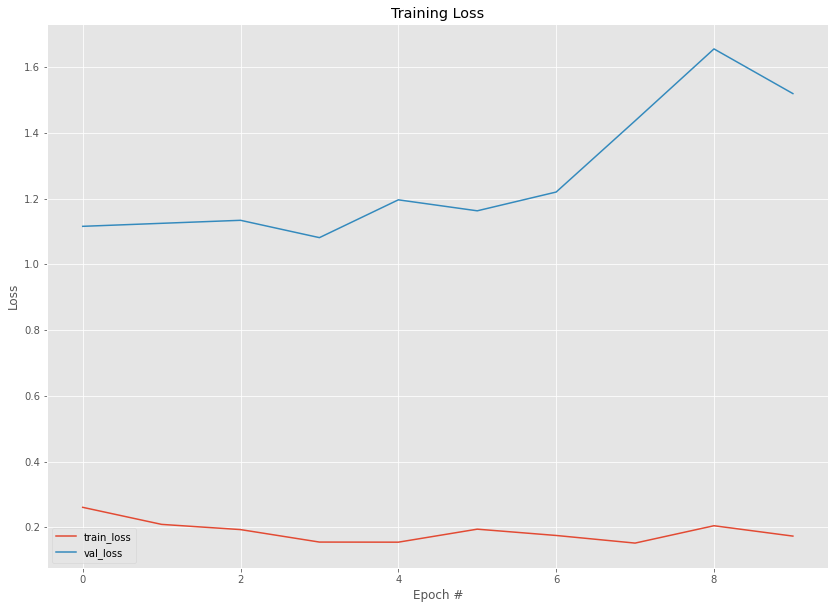

In [24]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

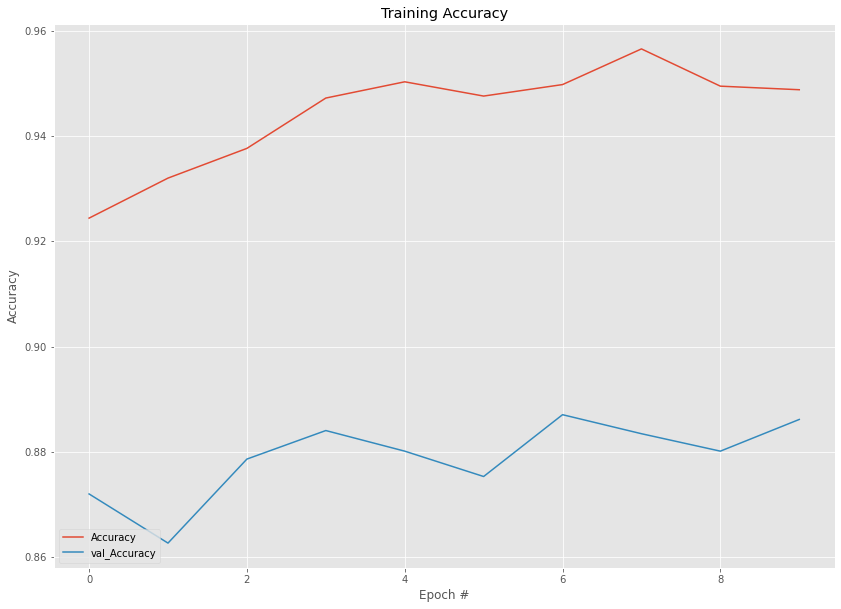

In [29]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["acc"], label="Accuracy")
plt.plot(N, H.history["val_acc"], label="val_Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

### MODEL 2

In [31]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    #layers.Resizing(128, 56),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2),
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 85, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 42, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 42, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 40, 32)       18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 20, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 20, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 39680)            

In [32]:
EPOCHS = 10
H = model.fit(x_train,
              y_train,
              epochs=EPOCHS,
              batch_size=100,
              validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

Train on 13284 samples, validate on 3321 samples
Epoch 1/10
13284/13284 [==============================] - 11s 837us/sample - loss: 0.7568 - acc: 0.7788 - val_loss: 0.3464 - val_acc: 0.8678
Epoch 2/10
13284/13284 [==============================] - 8s 630us/sample - loss: 0.2597 - acc: 0.9143 - val_loss: 0.2235 - val_acc: 0.9226
Epoch 3/10
13284/13284 [==============================] - 10s 717us/sample - loss: 0.2054 - acc: 0.9326 - val_loss: 0.2328 - val_acc: 0.9298
Epoch 4/10
13284/13284 [==============================] - 9s 669us/sample - loss: 0.1749 - acc: 0.9486 - val_loss: 0.1502 - val_acc: 0.9521
Epoch 5/10
13284/13284 [==============================] - 10s 727us/sample - loss: 0.1414 - acc: 0.9570 - val_loss: 0.1679 - val_acc: 0.9449
Epoch 6/10
13284/13284 [==============================] - 9s 669us/sample - loss: 0.1137 - acc: 0.9639 - val_loss: 0.1414 - val_acc: 0.9609
Epoch 7/10
13284/13284 [==============================] - 9s 706us/sample - loss: 0.1146 - acc: 0.9650 - val

In [33]:
print(H.history)

{'loss': [0.7567554899984654, 0.25967991792924144, 0.20536607107020258, 0.17493183275270233, 0.1414489712665972, 0.1137178859549208, 0.1145852279681931, 0.08718592299665001, 0.07994688505425183, 0.08368734765693532], 'acc': [0.7787564, 0.91433305, 0.9326257, 0.94858474, 0.95701593, 0.9639416, 0.9649955, 0.9708672, 0.9727492, 0.97207165], 'val_loss': [0.3464157007089475, 0.22345247209628494, 0.2328392949064106, 0.15018500183961075, 0.16785935147726294, 0.1413512958465517, 0.13599961908358618, 0.11613878101397623, 0.10635781105976799, 0.1000159554244057], 'val_acc': [0.8678109, 0.9226137, 0.9298404, 0.95212287, 0.9448961, 0.9608552, 0.9587474, 0.973502, 0.97199637, 0.97289973]}


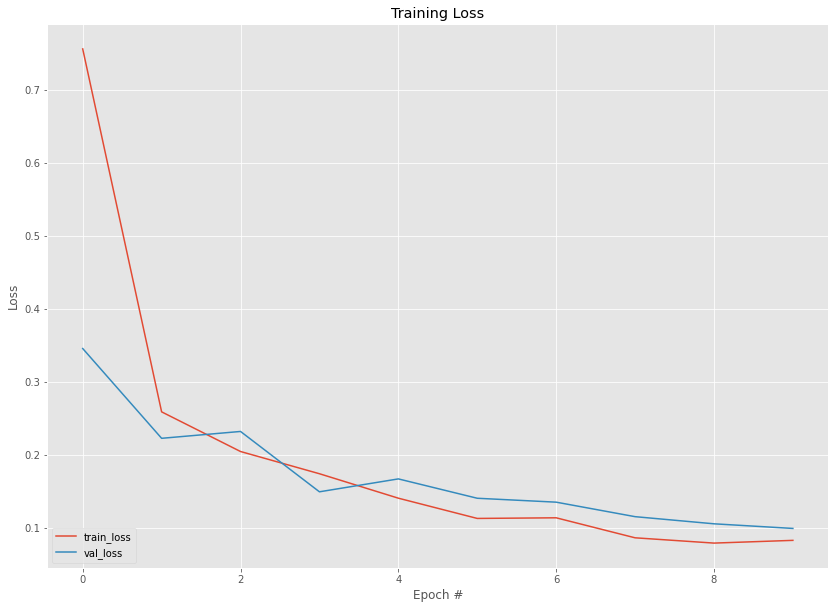

In [34]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

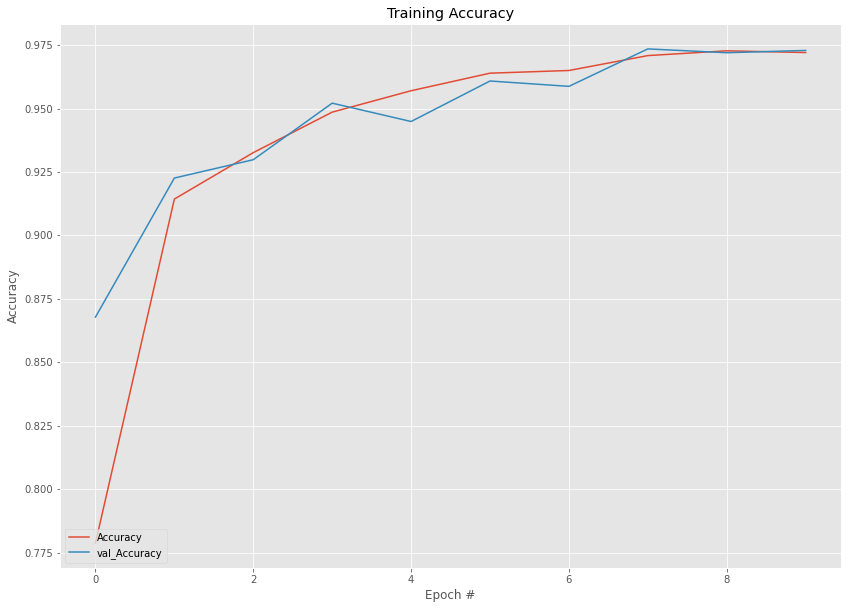

In [35]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
plt.plot(N, H.history["acc"], label="Accuracy")
plt.plot(N, H.history["val_acc"], label="val_Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

Recall the sample displayed earlier ,test_label[5000] , lets see what the model says

C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Owner\Anaconda3\envs\vocaloid\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


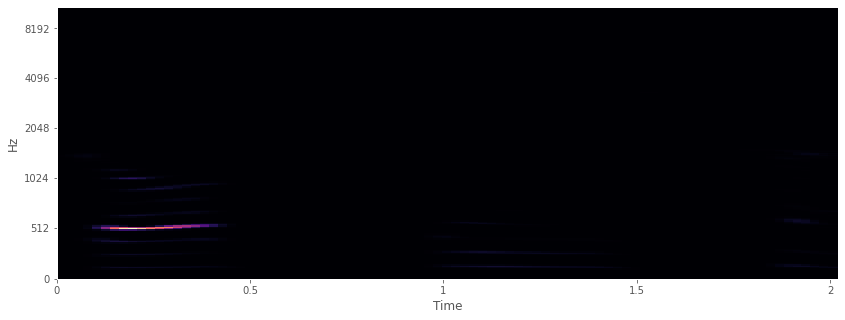

In [40]:
plt.figure(figsize=(14, 5))
t1 = np.squeeze(class_samples[mark_voice[5001]], axis=-1)
librosa.display.specshow(t1,x_axis='time', y_axis='mel')
ipd.Audio(librosa.feature.inverse.mel_to_audio(t1),rate=22050)

In [54]:
test_preds = np.asarray(class_samples[mark_voice[5000]:mark_voice[5009]])
predictions = model.predict(test_preds)
print(predictions)

[[-3.5725036  7.137306 ]
 [-2.821214   5.1896424]
 [-3.544519   5.8674245]
 [-4.2791657  4.763966 ]
 [-5.0313997  7.8773026]
 [-4.027101   7.154998 ]
 [-4.3930907  8.324633 ]
 [-4.660191   7.4017243]
 [-2.8389475  4.8508406]]


In [63]:
t2 = (np.expand_dims(class_samples[mark_voice[5001]],0))
predictions = model.predict(t2)
print(np.argmax(predictions[0]))

1


In [72]:
a = np.asarray(np.argmax(predictions[0]))
a = np.expand_dims(a,axis=-1)
print(encoder.inverse_transform(a))

['voice']


## Data augmentation and application

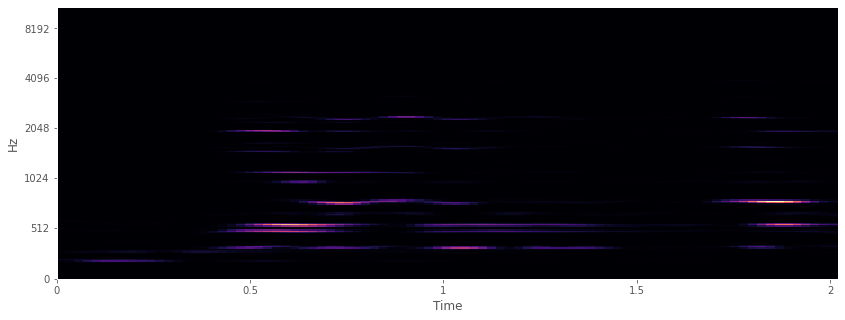

In [73]:
plt.figure(figsize=(14, 5))
t3 = np.squeeze(class_samples[2444], axis=-1)
librosa.display.specshow(t3,x_axis='time', y_axis='mel')
ipd.Audio(librosa.feature.inverse.mel_to_audio(t3),rate=22050)

(22016,)


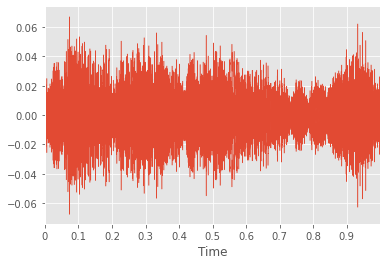

In [112]:
x1 = librosa.feature.inverse.mel_to_audio(t1)
x2 = librosa.feature.inverse.mel_to_audio(t3)

# MERGE
x3 = (x1+x2)/2
x3 = librosa.effects.time_stretch(x3, rate=2.0)
print(x3.shape)
librosa.display.waveplot(x3, sr=22050)

# REPRODUCE
ipd.Audio(x3, rate=22050)

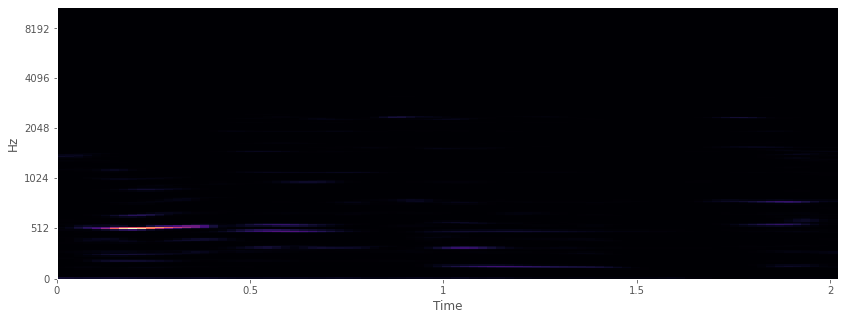

In [113]:
n_fft = 2048
hop_length = 256
win_length=n_fft
n_mels =256
x3 = librosa.feature.melspectrogram(x3,n_fft=n_fft,hop_length=hop_length,win_length=win_length,n_mels=n_mels)
plt.figure(figsize=(14, 5))
librosa.display.specshow(x3,x_axis='time', y_axis='mel')

In [114]:
x3 = np.expand_dims(x3,-1)
print(x3.shape)

tt = np.expand_dims(x3,0)
print(tt.shape)
predictions = model.predict(tt)
print(predictions)
print(np.argmax(predictions[0]))

a = np.asarray(np.argmax(predictions[0]))
a = np.expand_dims(a,axis=-1)
print(encoder.inverse_transform(a))

(256, 87, 1)
(1, 256, 87, 1)
[[ 0.72089636 -1.7641976 ]]
0
['not-voice']


### Conclusion:
will need to augment data with voice mixed with noise to get better results